# Загрузка данны

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [433]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [243]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [244]:
y_train = train['SalePrice']
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

In [245]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [246]:
train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [247]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Корреляции в данных

<AxesSubplot:>

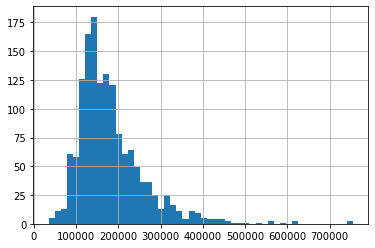

In [248]:
train['SalePrice'].hist(bins = 50)

Нормальное распределение, перекошенное влево

In [249]:
feat_corr = train.corr()

<AxesSubplot:>

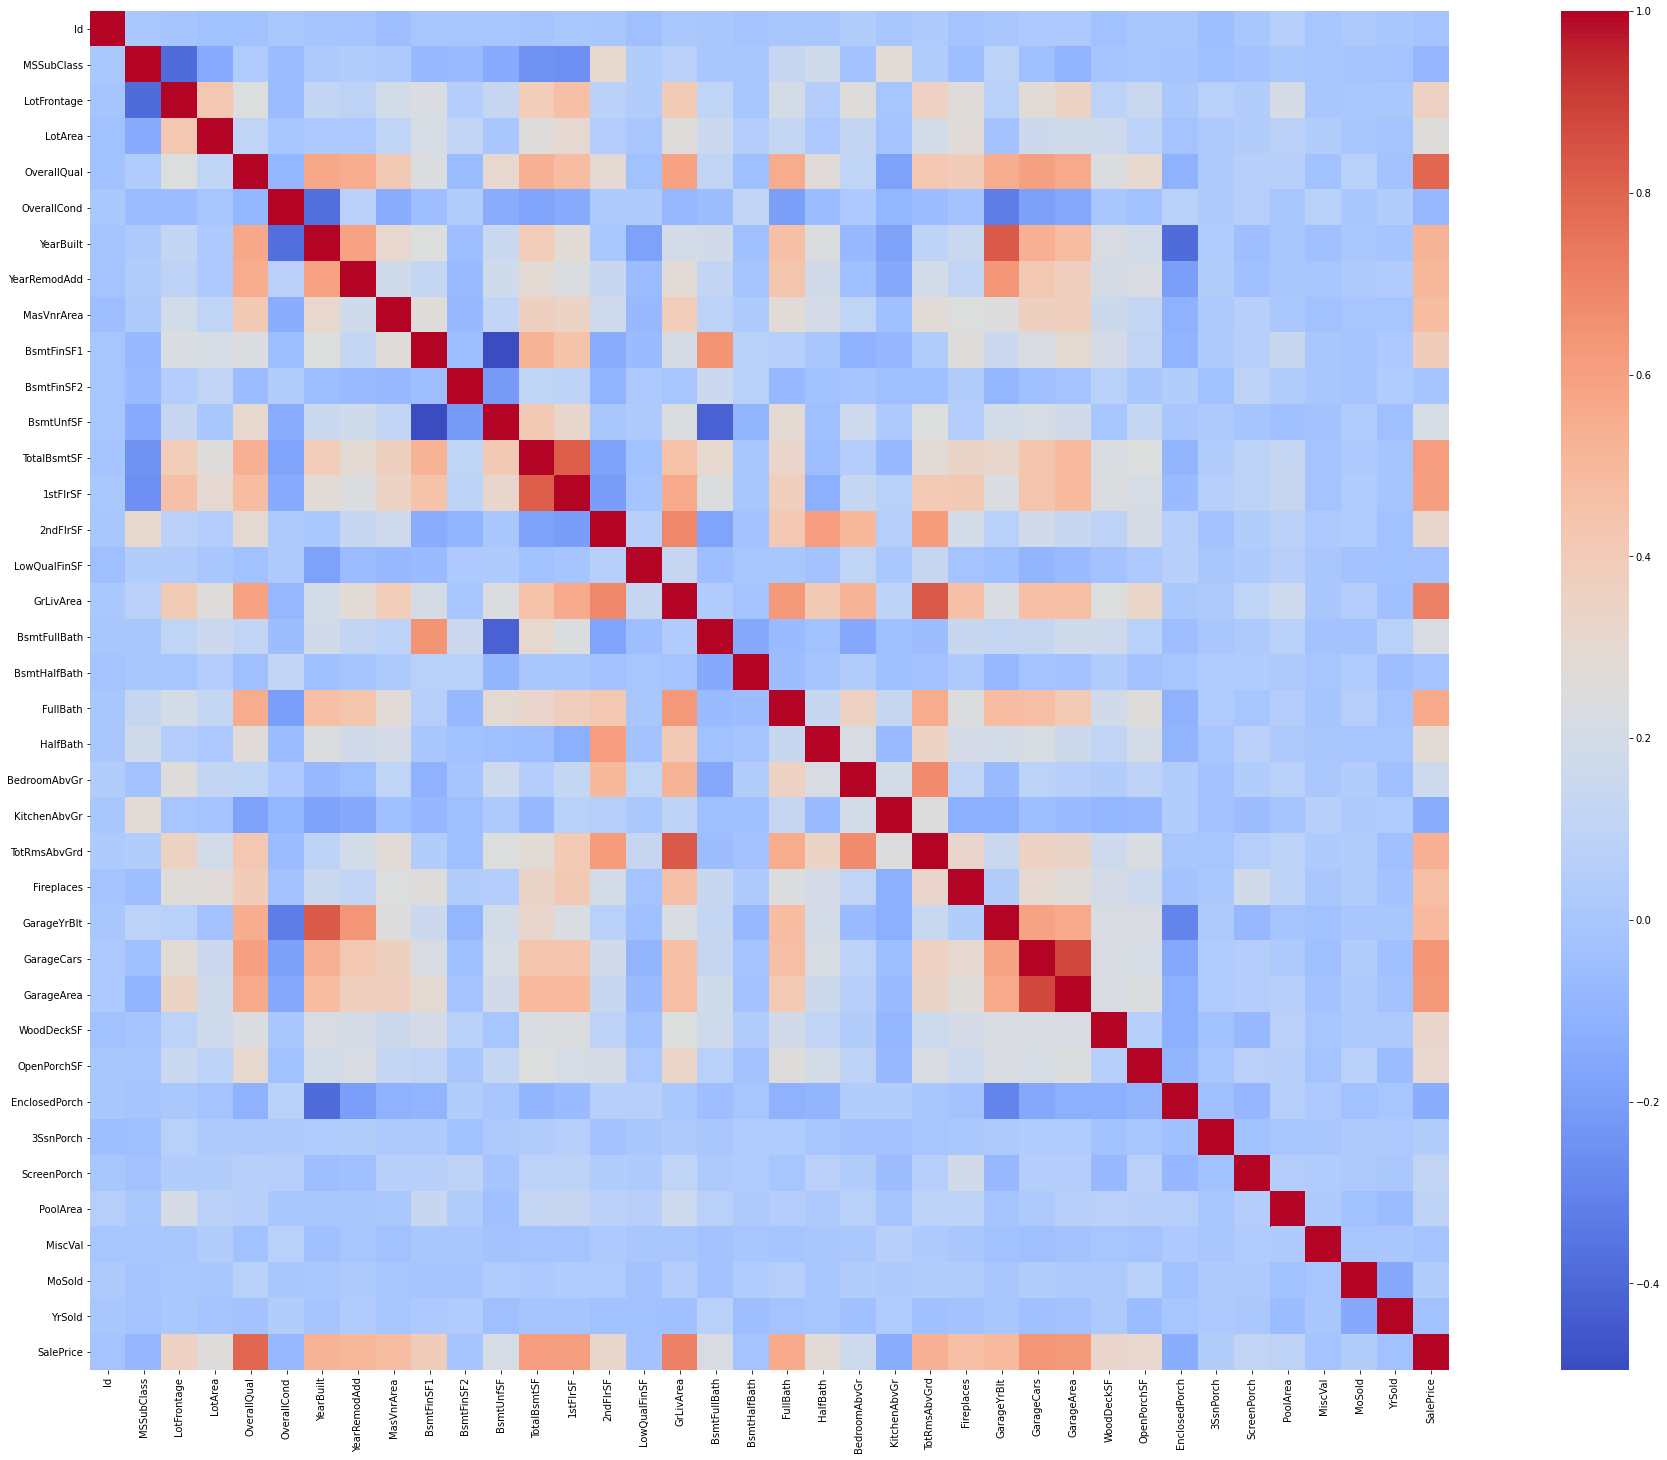

In [250]:
f, ax = plt.subplots(figsize=(40, 25))
sns.heatmap(feat_corr, square=True,cmap='coolwarm')

In [252]:
correlations = feat_corr['SalePrice'].sort_values(ascending=False)
features = correlations.index[0:10]
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


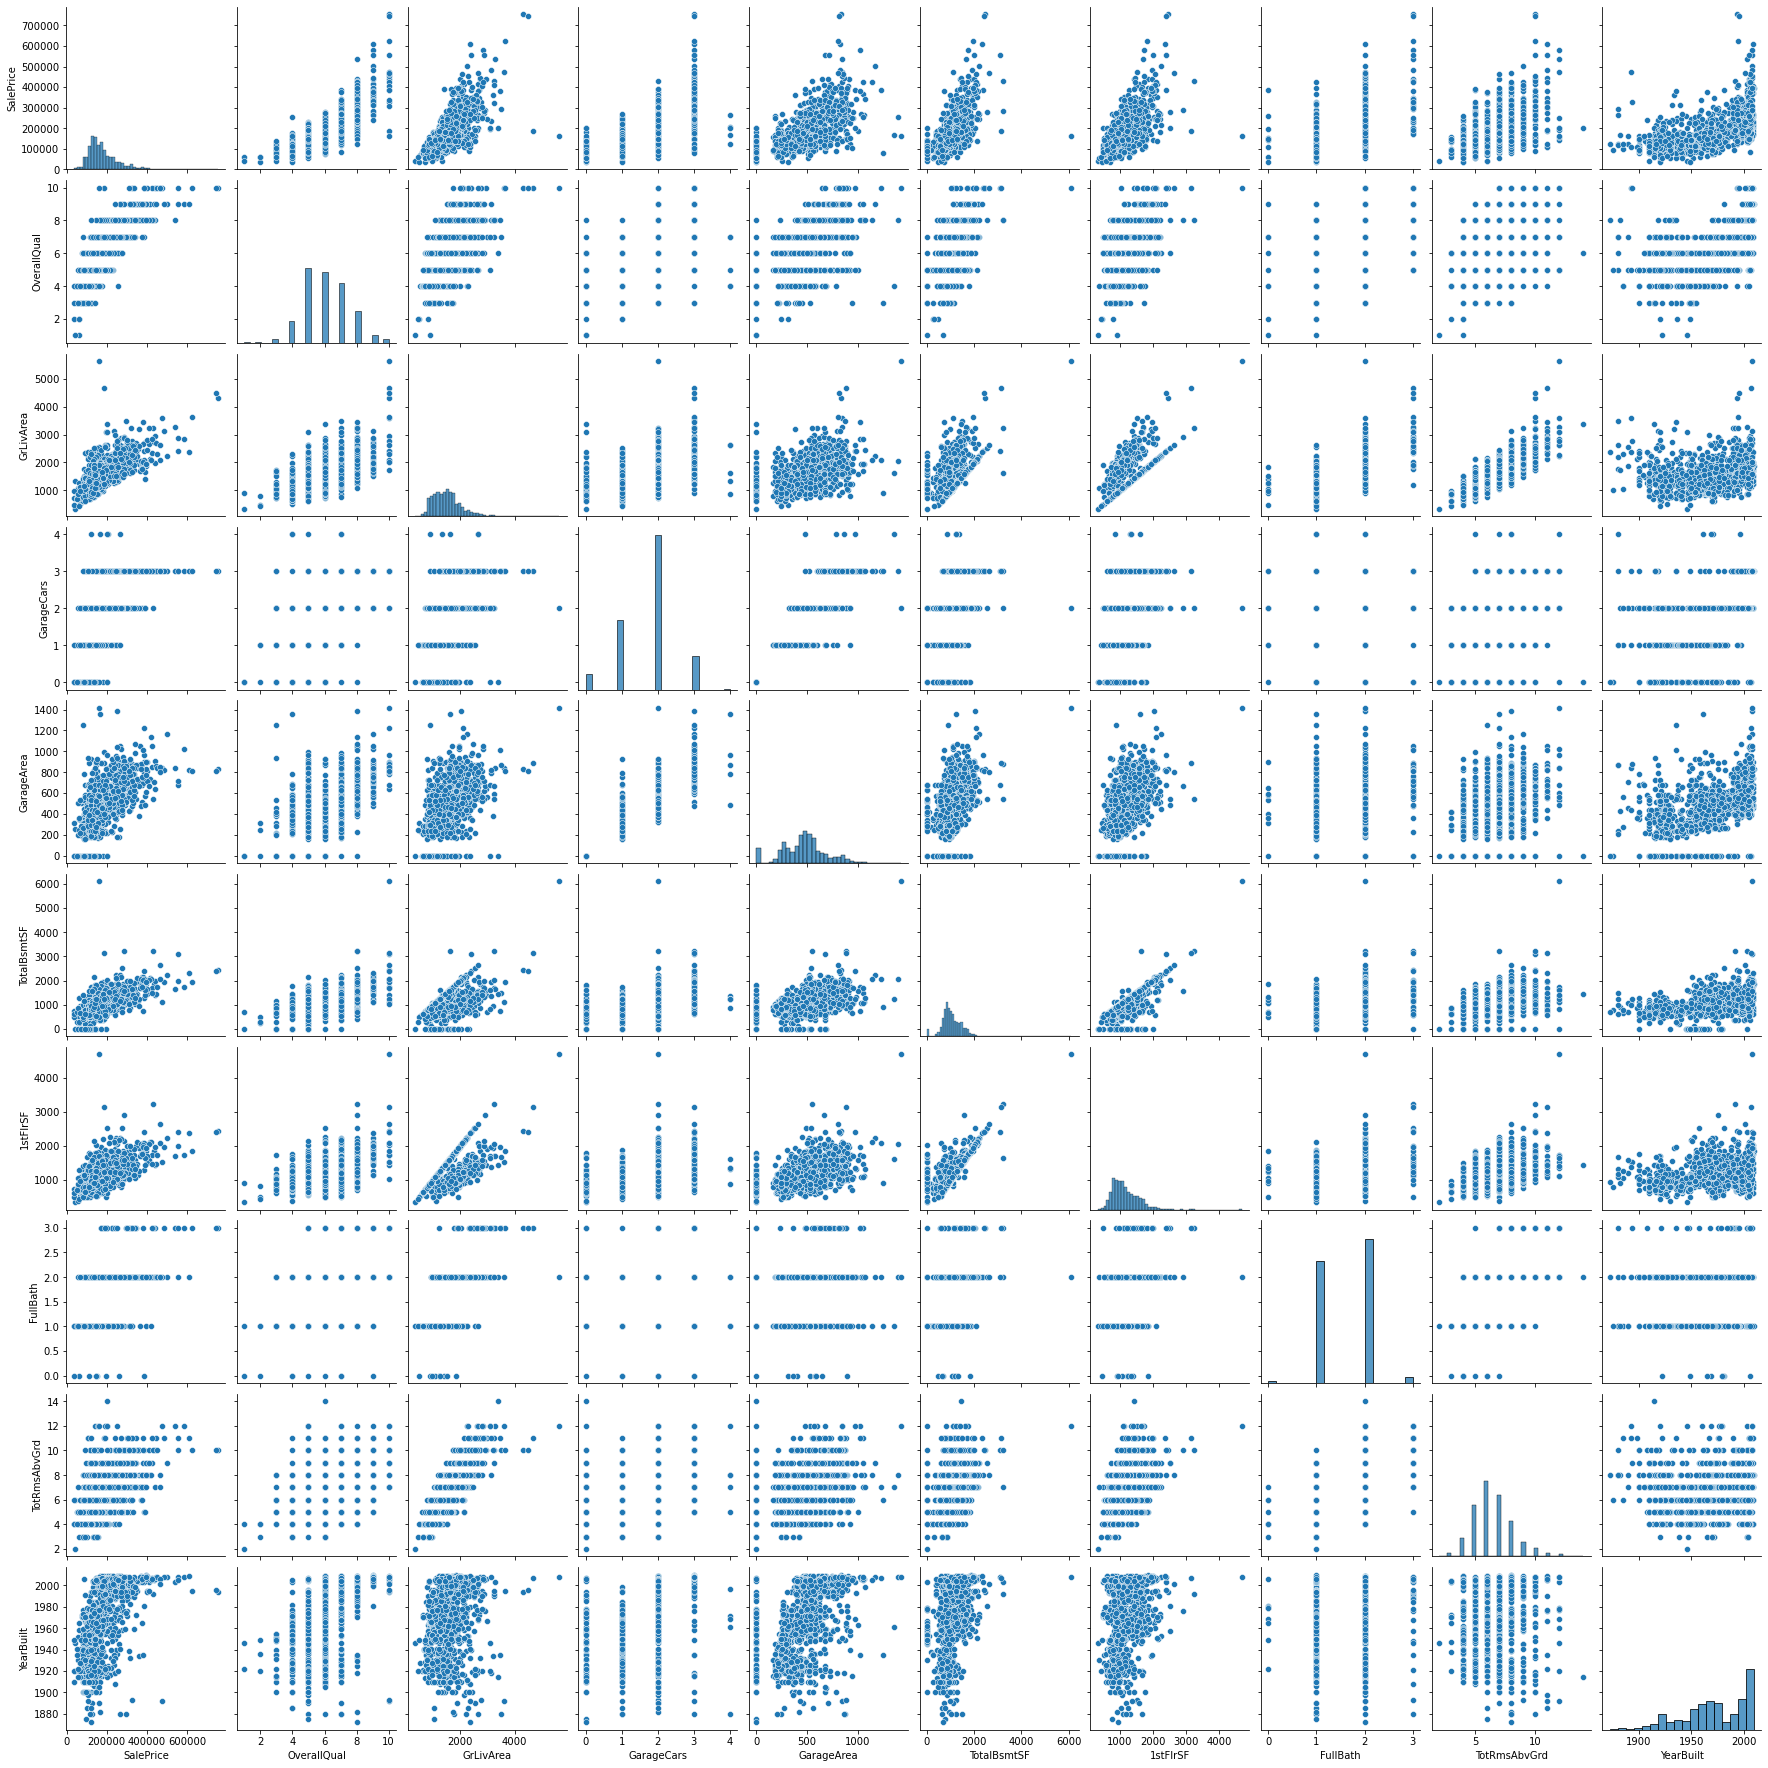

In [253]:
sns.pairplot(train[features], size = 2.5)
plt.show();

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

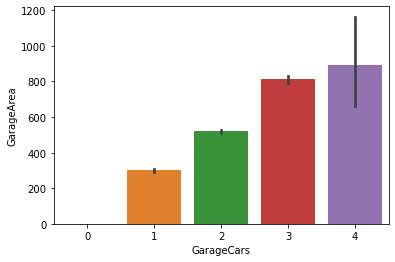

In [254]:
sns.barplot(x = 'GarageCars', y = 'GarageArea', data=train)

# Обработка пропусков

In [255]:
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)
# data.drop(['Id'], axis=1, inplace=True)

In [256]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [257]:
train_null = pd.isnull(train).sum()
test_null = pd.isnull(test).sum()

null = pd.concat([train_null, test_null], axis=1, keys=["Train", "Test"])
# pd.set_option("max_rows", None)
null

,Train,Test
MSSubClass,0,0.0
MSZoning,0,4.0
LotFrontage,259,227.0
LotArea,0,0.0
Street,0,0.0
...,...,...
MoSold,0,0.0
YrSold,0,0.0
SaleType,0,1.0
SaleCondition,0,0.0


Признаки со значимыми пропусками в данных (из data_describtion.txt):

In [258]:
null_meaning = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

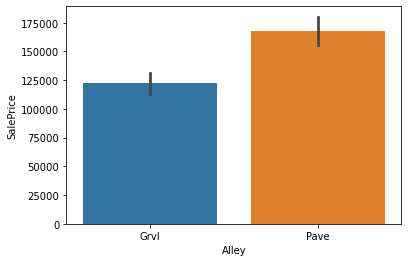

In [259]:
sns.barplot(x='Alley', y = 'SalePrice', data=train)

### Drop features

In [260]:
test.drop(['Alley'],axis=1,inplace=True)
train.drop(['Alley'],axis=1,inplace=True)

In [261]:
# Для значимых пропусков
for i in null_meaning:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)

<AxesSubplot:>

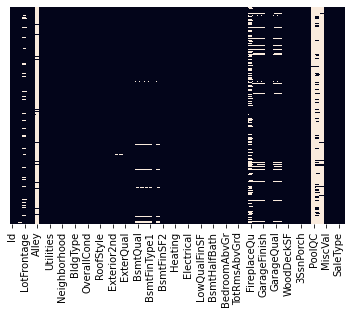

In [262]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [263]:
types_train = train.dtypes
num_train = types_train[(types_train == int) | (types_train == float)] 
cat_train = types_train[types_train == object]

types_test = test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

print(cat_train.shape, '\n', cat_test.shape, '\n', num_train.shape, '\n', num_train.shape)

(42,) 
 (42,) 
 (37,) 
 (37,)


In [264]:
train_null = pd.isnull(train).sum()
train_null[train_null.values > 0]

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

In [265]:
train.shape, test.shape

((1460, 79), (1459, 78))

Заполняем пропуски медианами для численных признаков, и модами - для категориальных

In [266]:
for feat in cat_train.index:
  train[feat].fillna(train[feat].mode()[0], inplace=True)

In [267]:
for feat in num_train.index:
  train[feat].fillna(train[feat].mean(), inplace=True)

In [268]:
for feat in cat_test.index:
  test[feat].fillna(test[feat].mode()[0], inplace=True)

In [269]:
for feat in num_test.index:
  test[feat].fillna(test[feat].mean(), inplace=True)

<AxesSubplot:>

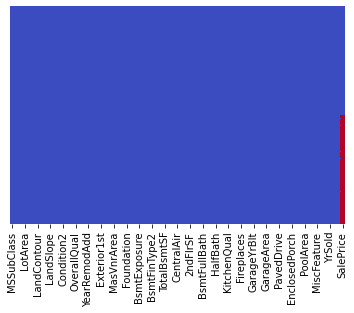

In [270]:
sns.heatmap(pd.concat((train, test)).isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [271]:
train.shape, test.shape

((1460, 79), (1459, 78))

# Добавление признаков

In [272]:
data = pd.concat([train, test], axis=0)
data.drop(['SalePrice'], axis=1, inplace=True)

In [273]:
data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] +
                                 data['1stFlrSF'] + data['2ndFlrSF'])

data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +
                              data['EnclosedPorch'] + data['ScreenPorch'] +
                              data['WoodDeckSF'])

In [274]:
data.drop(['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
            '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'FullBath',
            'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
            'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2,2008,WD,Normal,4006,2566.0,2416.0,3.5,61
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,5,2007,WD,Normal,3952,2524.0,2240.0,2.5,298
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,9,2008,WD,Normal,4003,2706.0,2272.0,3.5,42
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,2,2006,WD,Abnorml,3885,2473.0,1933.0,2.0,307
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,12,2008,WD,Normal,4000,3343.0,2853.0,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,6,2006,WD,Normal,3940,1638.0,1092.0,1.5,0
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,4,2006,WD,Abnorml,3940,1638.0,1344.0,1.5,24
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,9,2006,WD,Abnorml,3956,2448.0,2448.0,2.0,474
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,700,7,2006,WD,Normal,3984,1882.0,1307.0,1.5,112


# Обработка признаков

Категориальные порядковые признаки

Так как значение некоторых категориальных признаков представляют из себя порядковую оценку качества, приведем из к численным
Пазделим датасет, чтобы данные из тестовой выборки не "просочились" в train

In [275]:
train = data.iloc[:1460,:]
test = data.iloc[1460:,:]

In [ ]:
dict_LotShape = {'Reg' : 3,
                 'IR1' : 2,
                 'IR2' : 1,
                 'IR3' : 0}

train['LotShape'] = train['LotShape'].replace(dict_LotShape)
test['LotShape'] = test['LotShape'].replace(dict_LotShape)

In [ ]:
dict_Uti = {'AllPub': 3,
            'NoSewr': 2,
            'NoSeWa': 1,
            'ELO': 0}

train['Utilities'] = train['Utilities'].replace(dict_Uti)
test['Utilities'] = test['Utilities'].replace(dict_Uti)

In [ ]:
dict_Land = {'Gtl': 2,
             'Mod': 1,
             'Sev': 0}

train['LandSlope'] = train['LandSlope'].replace(dict_Land)
test['LandSlope'] = test['LandSlope'].replace(dict_Land)

In [ ]:
dict_Qual = {'Ex': 4,
             'Gd': 3,
             'TA': 2,
             'Fa': 1,
             'Po': 0}

train['ExterQual'] = train['ExterQual'].replace(dict_Qual)
test['ExterQual'] = test['ExterQual'].replace(dict_Qual)

train['HeatingQC'] = train['HeatingQC'].replace(dict_Qual)
test['HeatingQC'] = test['HeatingQC'].replace(dict_Qual)

train['ExterCond'] = train['ExterCond'].replace(dict_Qual)
test['ExterCond'] = test['ExterCond'].replace(dict_Qual)

train['KitchenQual'] = train['KitchenQual'].replace(dict_Qual)
test['KitchenQual'] = test['KitchenQual'].replace(dict_Qual)

In [ ]:
dict_Bsmt= {'Ex': 5,
             'Gd': 4,
             'TA': 3,
             'Fa': 2,
             'Po': 1,
            'None': 0}

train['BsmtQual'] = train['BsmtQual'].replace(dict_Bsmt)
test['BsmtQual'] = test['BsmtQual'].replace(dict_Bsmt)

train['BsmtCond'] = train['BsmtCond'].replace(dict_Bsmt)
test['BsmtCond'] = test['BsmtCond'].replace(dict_Bsmt)

train['FireplaceQu'] = train['FireplaceQu'].replace(dict_Bsmt)
test['FireplaceQu'] = test['FireplaceQu'].replace(dict_Bsmt)

train['GarageQual'] = train['GarageQual'].replace(dict_Bsmt)
test['GarageQual'] = test['GarageQual'].replace(dict_Bsmt)

train['GarageCond'] = train['GarageCond'].replace(dict_Bsmt)
test['GarageCond'] = test['GarageCond'].replace(dict_Bsmt)

In [ ]:
dict_Exposure = {'Gd': 4,
                 'Av': 3,
                 'Mn': 2,
                 'No': 1,
                 'None': 0}

train['BsmtExposure'] = train['BsmtExposure'].replace(dict_Exposure)
test['BsmtExposure'] = test['BsmtExposure'].replace(dict_Exposure)

In [ ]:
dict_fin = {'GLQ': 6,
            'ALQ': 5,
            'BLQ': 4,
            'Rec': 3,
            'LwQ': 2,
            'Unf': 1,
            'None': 0}

train['BsmtFinType1'] = train['BsmtFinType1'].replace(dict_fin)
test['BsmtFinType1'] = test['BsmtFinType1'].replace(dict_fin)

train['BsmtFinType2'] = train['BsmtFinType2'].replace(dict_fin)
test['BsmtFinType2'] = test['BsmtFinType2'].replace(dict_fin)

In [ ]:
train['CentralAir'] = LabelEncoder().fit_transform(train['CentralAir'])
test['CentralAir'] = LabelEncoder().fit_transform(test['CentralAir']) 

In [ ]:
dict_Garage = {'Fin': 3,
               'RFn': 2,
               'Unf': 1,
               'None': 0}

train['GarageFinish'] = train['GarageFinish'].replace(dict_Garage)
test['GarageFinish'] = test['GarageFinish'].replace(dict_Garage)

In [ ]:
dict_Pool = {'Ex': 4,
             'Gd': 3,
             'TA': 2,
             'Fa': 1,
             'None': 0}

train['PoolQC'] = train['PoolQC'].replace(dict_Pool)
test['PoolQC'] = test['PoolQC'].replace(dict_Pool)

In [ ]:
dict_Fence = {'GdPrv': 4,
              'MnPrv': 3,
              'GdWo': 2,
              'MnWw': 1,
              'None': 0}

train['Fence'] = train['Fence'].replace(dict_Fence)
test['Fence'] = test['Fence'].replace(dict_Fence)

In [287]:
types_train = train.dtypes
num_train = types_train[(types_train == int) | (types_train == float)] 
cat_train = types_train[types_train == object]

types_test = test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

print(cat_train.shape, '\n', cat_test.shape, '\n', num_train.shape, '\n', num_train.shape)

(23,) 
 (23,) 
 (60,) 
 (60,)


In [288]:
test_fn = test.copy()
train_fn = train.copy()

### OneHotEncoding

In [289]:
data_fn = pd.concat([train_fn, test_fn], axis=0)

In [290]:
types_data = data_fn.dtypes
num_data = types_data[(types_data == int) | (types_data == float)]
cat_data = types_data[types_data == object]

In [291]:
for feat in cat_data.index:
  cat_feat = pd.get_dummies(data_fn[feat], drop_first=True)
  data_fn.drop([feat], axis=1, inplace=True)
  data_fn = pd.concat([data_fn, cat_feat], axis = 1)

### Удоляем дубликаты

In [292]:
columns_dubl = data_fn.columns[data_fn.columns.duplicated()]
data_df = data_fn.drop(columns_dubl, axis=1)

# Построение модели

## XGBoost

In [293]:
X_train = data_df.iloc[:1460,:]
X_test = data_df.iloc[1460:,:]

In [294]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

Подбор гиперпараметров

In [295]:
regressor = XGBRegressor()

In [88]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15, 25]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5]

In [92]:
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [94]:
# random_cv.fit(X_train, y_train)
# %time

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [96]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=1100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [98]:
regressor_cv = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=2,
             monotone_constraints='()', n_estimators=1100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [99]:
regressor_cv.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=1100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [100]:
predict = regressor_cv.predict(df_test)

In [101]:
predict

array([116608.1 , 164940.56, 184064.66, ..., 166489.06, 119706.46,
       222376.45], dtype=float32)

In [102]:
pred=pd.DataFrame(predict)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

score на Kaggle: 0.13250

## Настройка гиперпараметров через фреймворк optuna

In [319]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


In [300]:
X_train.shape

(1460, 166)

In [301]:
y_train.shape

(1460,)

In [298]:
def objective(trial,data=X_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        # 'tree_method':'gpu_hist',
        'n_jobs': -1,
        'booster': trial.suggest_categorical('booster', ['gbtree','gblinear']),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018,0.02,0.03,0.04,0.05]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 500, 900, 1100, 1500, 2000]),
        'max_depth': trial.suggest_categorical('max_depth', [2,3,4,5,7,9,11,13,15,17,20]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        'base_score': trial.suggest_categorical('base_score', [0.25,0.5,0.75,1]),
    }
    model = XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Best trial:', study.best_trial.params)

In [144]:
Best_trial = {'booster': 'gbtree', 
                'reg_lambda': 0.002780173835838584, 
                'reg_alpha': 0.01087769937331074, 
                'colsample_bytree': 0.6, 
                'subsample': 0.8, 
                'learning_rate': 0.009, 
                'n_estimators': 2000, 
                'max_depth': 13, 
                'min_child_weight': 8, 
                'base_score': 0.25}

In [368]:
model_xgr = XGBRegressor(**Best_trial)
model_xgr.fit(X_train, y_train)

[20:54:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:576: 
Parameters: { "criterion", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, criterion='friedman_mse',
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.016, max_delta_step=0,
             max_depth=5, max_features='auto', min_child_weight=1,
             min_samples_leaf=3, min_samples_split=0.6, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, ...)

In [369]:
predict = model_xgr.predict(X_test)

In [151]:
pred=pd.DataFrame(predict)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

score: 0.12816

## Gradient boosting regretion

In [307]:
from sklearn.ensemble import GradientBoostingRegressor

In [329]:
def objective_GB(trial,data=X_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        # 'tree_method':'gpu_hist',
        'alpha': trial.suggest_categorical('alpha', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),
        'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'mse']),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018,0.02,0.03,0.04,0.05]),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 500, 900, 1100, 1500, 2000]),
        'max_depth': trial.suggest_categorical('max_depth', [2,3,4,5,7,9,11,13,15,17,20]),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    model = GradientBoostingRegressor(**param)  
    
    model.fit(train_x,train_y)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_GB, n_trials=50)
print('Best trial:', study.best_trial.params)

In [332]:
Best_trial_GB={'alpha': 0.1, 'criterion': 'friedman_mse', 'subsample': 0.7, 'learning_rate': 0.016, 'n_estimators': 2000, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 0.6, 'max_features': 'auto'}

In [370]:
model_gb = GradientBoostingRegressor(**Best_trial_GB)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.016, max_depth=5,
                          max_features='auto', min_samples_leaf=3,
                          min_samples_split=0.6, n_estimators=2000,
                          subsample=0.7)

In [383]:
predict_GB = model_gb.predict(X_test)
pred=pd.DataFrame(predict_GB)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## RandomForest

In [334]:
from sklearn.ensemble import RandomForestRegressor

In [340]:
def objective_RF(trial,data=X_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        # 'tree_method':'gpu_hist',
        'n_jobs': -1,
        'ccp_alpha': trial.suggest_categorical('ccp_alpha', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),
        'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'mse']),
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 500, 900, 1100, 1500, 2000]),
        'max_depth': trial.suggest_categorical('max_depth', [2,3,4,5,7,9,11,13,15,17,20]),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'min_samples_split': trial.suggest_categorical('min_samples_split', [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    model = RandomForestRegressor(**param)  
    
    model.fit(train_x,train_y)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_RF, n_trials=50)
print('Best trial:', study.best_trial.params)

In [342]:
Best_trial_RF={'ccp_alpha': 0.8, 'criterion': 'mse', 'n_estimators': 1500, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 0.1, 'max_features': 'auto'}

In [371]:
model_rf = RandomForestRegressor(**Best_trial_RF)
model_rf.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.8, max_depth=5, min_samples_leaf=8,
                      min_samples_split=0.1, n_estimators=1500)

In [384]:
predict_RF = model_rf.predict(X_test)
pred=pd.DataFrame(predict_RF)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## SVR

In [344]:
from sklearn.svm import SVR

In [359]:
def objective_SVR(trial,data=X_train,target=y_train):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        # 'tree_method':'gpu_hist',
        'C': trial.suggest_int('C', 1, 100),
        'epsilon': trial.suggest_loguniform('epsilon', 0.01, 0.1),
        'gamma': trial.suggest_loguniform('gamma', 0.00001, 0.001),
    }
    model = SVR(**param)  
    
    model.fit(train_x,train_y)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_SVR, n_trials=50)
print('Best trial:', study.best_trial.params)

In [362]:
Best_trial_SVR={'C': 9, 'epsilon': 0.036271819113742255, 'gamma': 8.819488556934742e-05}

In [372]:
model_svr = SVR(**Best_trial_SVR)
model_svr.fit(X_train, y_train)

SVR(C=9, epsilon=0.036271819113742255, gamma=8.819488556934742e-05)

## Lasso and Ridge

In [357]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge, Lasso

In [414]:
kf = KFold(n_splits=3, random_state=0, shuffle=True)
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
scorer = make_scorer(rmse, greater_is_better=False)

def random_search(model, grid, n_iter=100):
    search = RandomizedSearchCV(model, grid, n_iter, scorer, n_jobs=-1, cv=kf, random_state=0, verbose=True)
    return search.fit(X_train, y_train)

In [ ]:
ridge = random_search(Ridge(), {"alpha": np.logspace(-1, 2, 500)})
lasso = random_search(Lasso(), {"alpha": np.logspace(-5, -1, 500)})
models = [search.best_estimator_ for search in [ridge, lasso]]

## Elastic regressor

In [405]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=0.0005, l1_ratio=0.9)
regr.fit(X_train, y_train)
elas_preds = regr.predict(X_test)

## Stacking Regressor

In [450]:
models_fn = [model_xgr, model_gb, regr, models[0], models[1]]

In [ ]:
stack_search = random_search(StackingCVRegressor(models_fn, Ridge(), cv=kf), {"meta_regressor__alpha": np.logspace(-3, -2, 50)}, n_iter=10)
models_fn.append(stack_search.best_estimator_)

In [457]:
preds_all = [model.predict(X_test) for model in models_fn]
preds = preds_all[0]*0.25 + preds_all[5]*0.75

In [458]:
pred=pd.DataFrame(preds)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)